# Data wrangling

### We doing an analysis of Umuzi's personality test scores from applicants that apply for the learnership.
#### Main tasks for this is to do dataframe merging, dataframe filtering and data manipulation(rows and columns).

In [17]:
#Modules imported
import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt

### Read in datasets using pandas 
#### Examine the data frame for duplicates (based on ID), and drop any duplicates that exist. Assert that the new data frame is the length of the unique entries of the original data frame.

In [18]:
scores = pd.read_csv('personality_scores.csv', delimiter=';', index_col='ID')
department = pd.read_csv('departments.csv', delimiter=';', index_col='ID')

In [19]:
#Droping any nan-values we may have
department = department.dropna(axis=1, how='any')
department.head()

,Department
ID,
0,Data
1,Data
2,Data
3,Data
4,Data


In [20]:
#Droping any nan-values we may have
pscore = scores.dropna(axis=1, how='any')
pscore.head()

,Section 5 of 6 [I am always prepared.],Section 5 of 6 [I am easily disturbed.],Section 5 of 6 [I am exacting (demanding) in my work.],Section 5 of 6 [I am full of ideas.],Section 5 of 6 [I am interested in people.],Section 5 of 6 [I am not interested in abstract ideas.],Section 5 of 6 [I am not interested in other people's problems.],Section 5 of 6 [I am not really interested in others.],Section 5 of 6 [I am quick to understand things.],Section 5 of 6 [I am quiet around strangers.],...,Section 5 of 6 [I often forget to put things back in their proper place],Section 5 of 6 [I pay attention to details.],Section 5 of 6 [I seldom feel blue (down).],Section 5 of 6 [I spend time reflecting on things.],Section 5 of 6 [I start conversations.],Section 5 of 6 [I sympathize with others' feelings.],Section 5 of 6 [I take time out for others.],Section 5 of 6 [I talk to a lot of different people at parties.],Section 5 of 6 [I use difficult words.],Section 5 of 6 [I worry about things.]
ID,,,,,,,,,,,,,,,,,,,,,
0,"(3, 5)","(4, 5)","(3, 5)","(5, 5)","(2, 3)","(5, 3)","(2, 3)","(2, 5)","(5, 5)","(1, 3)",...,"(3, 5)","(3, 5)","(4, 3)","(5, 5)","(1, 3)","(2, 5)","(2, 5)","(1, 3)","(5, 1)","(4, 3)"
1,"(3, 5)","(4, 5)","(3, 5)","(5, 5)","(2, 5)","(5, 3)","(2, 5)","(2, 5)","(5, 5)","(1, 3)",...,"(3, 5)","(3, 1)","(4, 1)","(5, 5)","(1, 5)","(2, 5)","(2, 5)","(1, 5)","(5, 3)","(4, 3)"
2,"(3, 5)","(4, 3)","(3, 3)","(5, 5)","(2, 5)","(5, 5)","(2, 5)","(2, 5)","(5, 5)","(1, 1)",...,"(3, 5)","(3, 5)","(4, 1)","(5, 3)","(1, 3)","(2, 5)","(2, 5)","(1, 3)","(5, 1)","(4, 3)"
3,"(3, 5)","(4, 5)","(3, 3)","(5, 5)","(2, 5)","(5, 3)","(2, 3)","(2, 3)","(5, 3)","(1, 3)",...,"(3, 1)","(3, 5)","(4, 1)","(5, 5)","(1, 5)","(2, 5)","(2, 5)","(1, 5)","(5, 1)","(4, 1)"
4,"(3, 3)","(4, 5)","(3, 3)","(5, 3)","(2, 3)","(5, 3)","(2, 3)","(2, 3)","(5, 5)","(1, 1)",...,"(3, 5)","(3, 5)","(4, 5)","(5, 5)","(1, 3)","(2, 3)","(2, 5)","(1, 3)","(5, 1)","(4, 3)"


In [21]:
department.shape

(1555, 1)

In [22]:
pscore.shape

(1555, 50)

### Converted the answer on each of the personality test questions to a number

In [23]:
#function to convert scores
def subscale_total(scores_per_person, subscale):
       subscale_sum = sum([eval(i)[1] for i in scores_per_person if eval(i)[0] == subscale])
       return(subscale_sum)

subscale_total(pscore.loc[0], 1)

30

### Calculated total scores for each of the subscales and new dataframe created for the scores

In [24]:
subscale_df = pd.DataFrame()
subscale_df['extraversion'] = pscore.apply(lambda row: subscale_total(row, 1), axis=1)
subscale_df['agreeableness'] = pscore.apply(lambda row: subscale_total(row, 2), axis=1)
subscale_df['conscientiousness'] = pscore.apply(lambda row: subscale_total(row, 3), axis=1)
subscale_df['stability'] = pscore.apply(lambda row: subscale_total(row, 4), axis=1)
subscale_df['intellect'] = pscore.apply(lambda row: subscale_total(row, 5), axis=1) 

In [25]:
subscale_df.head()

,extraversion,agreeableness,conscientiousness,stability,intellect
ID,,,,,
0,30,40,48,36,42
1,42,46,46,40,42
2,28,40,40,38,42
3,30,38,38,40,38
4,28,34,46,38,36


In [26]:
#Summary statistics 
subscale_df.describe()

,extraversion,agreeableness,conscientiousness,stability,intellect
count,1555.000000,1555.000000,1555.000000,1555.000000,1555.000000
mean,30.852733,42.180064,42.149196,36.118328,40.086174
std,8.076902,5.346042,5.924742,7.025337,5.469963
min,10.000000,22.000000,16.000000,12.000000,20.000000
25%,26.000000,38.000000,38.000000,32.000000,36.000000
50%,30.000000,42.000000,44.000000,38.000000,40.000000
75%,36.000000,46.000000,46.000000,42.000000,44.000000
max,50.000000,50.000000,50.000000,50.000000,50.000000


### Created a function that takes in subscale total, and for each subscale, creates a new column called '{subscale_name} interpretation' (e.g., conscientiousness interpretation) and applies the labels “low”, “medium”, or “high” according to a person’s score on that subscale.

In [27]:
#Function for labels
def score_interpretor(total):
    for row in subscale_df.columns:
        if total <= (subscale_df.loc[:, row].mean() - ((subscale_df.loc[:,row].std())/2)):
            return 'Scored low'
        elif total >= (subscale_df.loc[:, row].mean() + ((subscale_df.loc[:, row].std())/2)):
            return 'Scored high'
        else:
            return 'Score is medium'

In [28]:
#New dataframe for the labels low, medium, high
changed_df = pd.DataFrame(subscale_df.values, index = subscale_df.index)
new_subs = changed_df.applymap(score_interpretor)
new_subs.columns = ['extraversion_interpretation','agreeableness_interpretation','conscientiousness_interpretation', 'stability_interpretation','intellect_interpretation']
new_subs.head()

,extraversion_interpretation,agreeableness_interpretation,conscientiousness_interpretation,stability_interpretation,intellect_interpretation
ID,,,,,
0,Score is medium,Scored high,Scored high,Scored high,Scored high
1,Scored high,Scored high,Scored high,Scored high,Scored high
2,Score is medium,Scored high,Scored high,Scored high,Scored high
3,Score is medium,Scored high,Scored high,Scored high,Scored high
4,Score is medium,Score is medium,Scored high,Scored high,Scored high


### Merged the department data frame with the personality score data frame, keeping all applicants within the department data frame.

In [29]:
#Merged using the pandas .merge function
merged_df = pd.merge(subscale_df, department, on=['ID'])
merged_df.head()

,extraversion,agreeableness,conscientiousness,stability,intellect,Department
ID,,,,,,
0,30,40,48,36,42,Data
1,42,46,46,40,42,Data
2,28,40,40,38,42,Data
3,30,38,38,40,38,Data
4,28,34,46,38,36,Data


In [14]:
merged_df.shape

(1555, 6)

In [15]:
merged_df.Department.unique()

array(['Data', 'Web Dev', 'Copywriting', 'Design', 'Strategy', 'Web dev'],
      dtype=object)

### Created histograms of personality scores by department.

In [16]:
data = merged_df[merged_df.Department == 'Data']
data = pd.DataFrame(data)
data.head()

,extraversion,agreeableness,conscientiousness,stability,intellect,Department
ID,,,,,,
0,30,40,48,36,42,Data
1,42,46,46,40,42,Data
2,28,40,40,38,42,Data
3,30,38,38,40,38,Data
4,28,34,46,38,36,Data


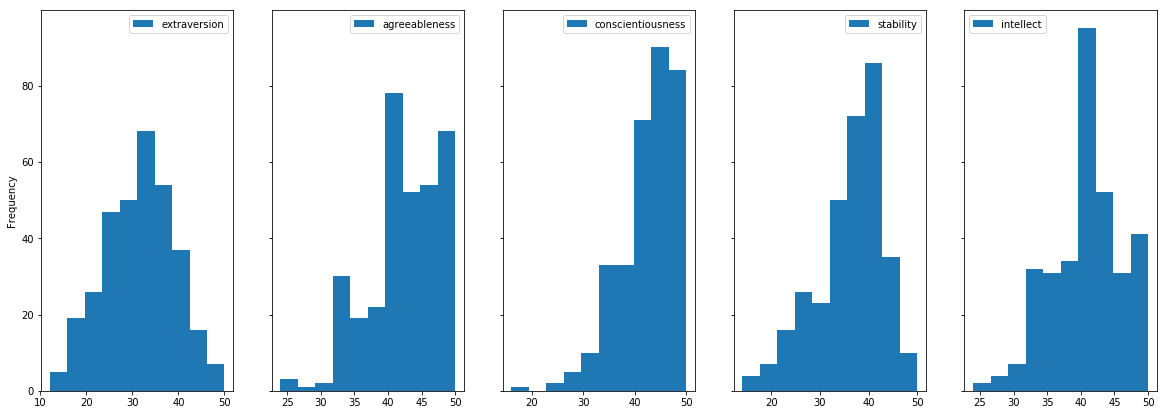

In [17]:
fig, axs = plt.subplots(1, 5, sharey=True)
data.plot(kind='hist', y='extraversion', ax=axs[0], figsize=(20, 7))
data.plot(kind='hist', y='agreeableness', ax=axs[1])
data.plot(kind='hist', y='conscientiousness', ax=axs[2])
data.plot(kind='hist', y='stability', ax=axs[3])
data.plot(kind='hist', y='intellect', ax=axs[4])

In [18]:
data1 = merged_df[merged_df.Department == 'Web Dev']
data1 = pd.DataFrame(data1)
data1.head()

,extraversion,agreeableness,conscientiousness,stability,intellect,Department
ID,,,,,,
29,34,44,44,42,42,Web Dev
30,42,46,42,38,42,Web Dev
31,40,40,50,38,42,Web Dev
32,30,36,46,42,46,Web Dev
33,46,48,44,30,44,Web Dev


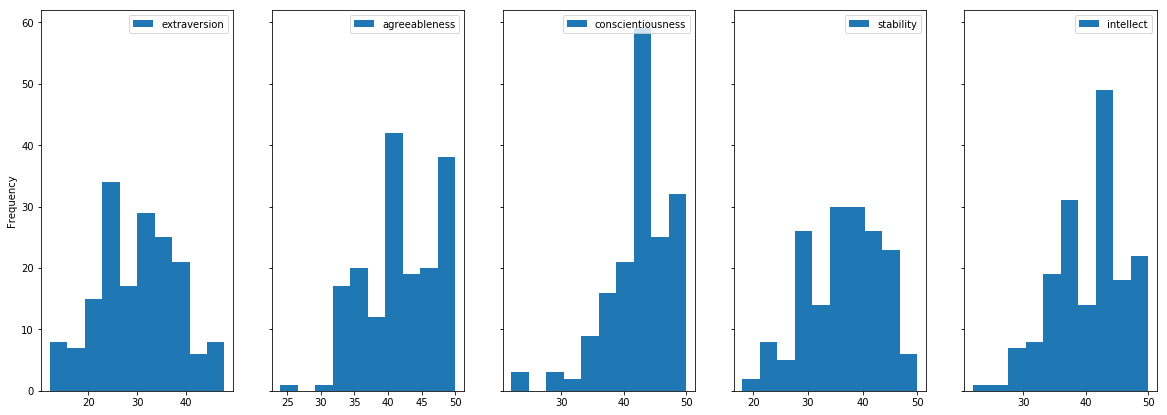

In [19]:
fig, axs = plt.subplots(1, 5, sharey=True)
data1.plot(kind='hist', y='extraversion', ax=axs[0], figsize=(20, 7))
data1.plot(kind='hist', y='agreeableness', ax=axs[1])
data1.plot(kind='hist', y='conscientiousness', ax=axs[2])
data1.plot(kind='hist', y='stability', ax=axs[3])
data1.plot(kind='hist', y='intellect', ax=axs[4])
#df_salary.plot(kind='hist', y='yearsabs', ax=axs[5])

In [20]:
data2 = merged_df[merged_df.Department == 'Copywriting']
data2 = pd.DataFrame(data2)
data2.head()

,extraversion,agreeableness,conscientiousness,stability,intellect,Department
ID,,,,,,
199,12,44,48,32,38,Copywriting
200,34,46,40,40,44,Copywriting
201,40,46,34,32,32,Copywriting
202,24,38,48,40,46,Copywriting
203,36,40,42,44,42,Copywriting


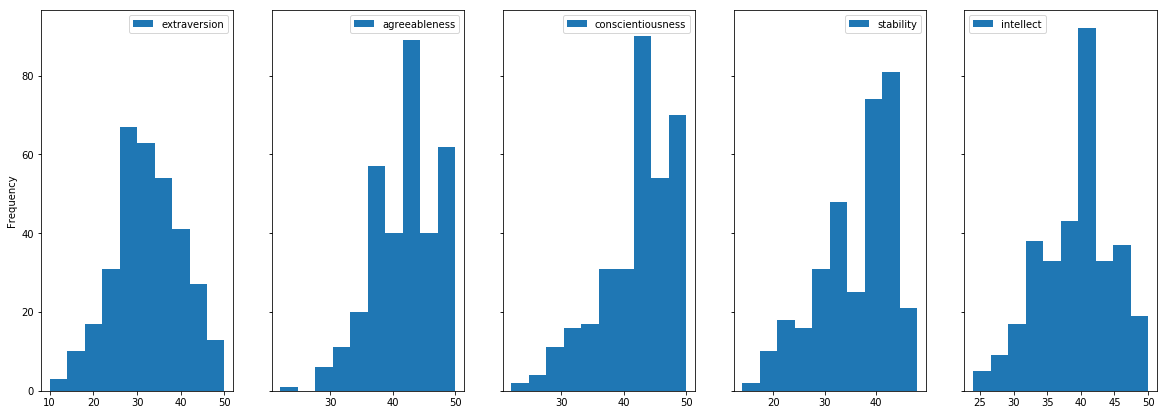

In [21]:
fig, axs = plt.subplots(1, 5, sharey=True)
data2.plot(kind='hist', y='extraversion', ax=axs[0], figsize=(20, 7))
data2.plot(kind='hist', y='agreeableness', ax=axs[1])
data2.plot(kind='hist', y='conscientiousness', ax=axs[2])
data2.plot(kind='hist', y='stability', ax=axs[3])
data2.plot(kind='hist', y='intellect', ax=axs[4])

In [22]:
data3 = merged_df[merged_df.Department == 'Design']
data3 = pd.DataFrame(data3)
data3.head()

,extraversion,agreeableness,conscientiousness,stability,intellect,Department
ID,,,,,,
235,36,44,48,48,46,Design
236,22,42,34,30,40,Design
237,32,34,46,38,34,Design
238,36,40,44,32,48,Design
239,24,36,46,16,34,Design


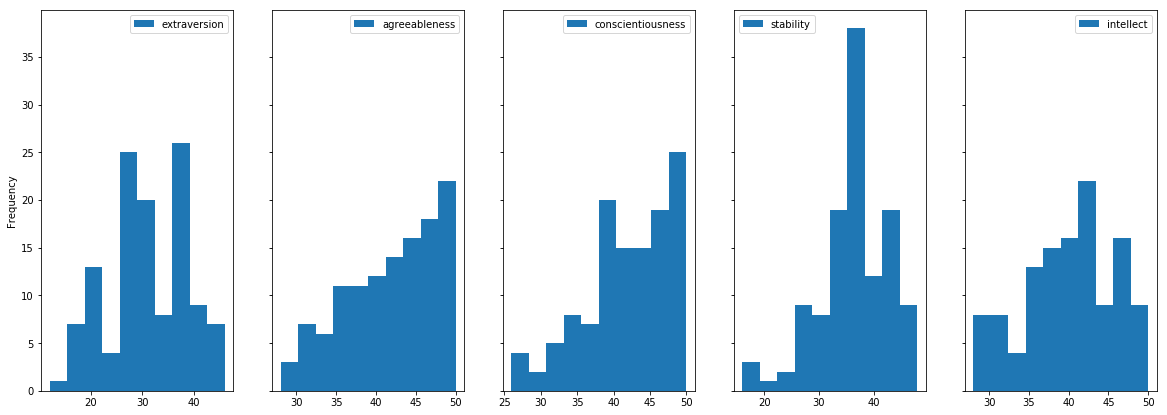

In [23]:
fig, axs = plt.subplots(1, 5, sharey=True)
data3.plot(kind='hist', y='extraversion', ax=axs[0], figsize=(20, 7))
data3.plot(kind='hist', y='agreeableness', ax=axs[1])
data3.plot(kind='hist', y='conscientiousness', ax=axs[2])
data3.plot(kind='hist', y='stability', ax=axs[3])
data3.plot(kind='hist', y='intellect', ax=axs[4])

In [24]:
data4 = merged_df[merged_df.Department == 'Strategy']
data4 = pd.DataFrame(data4)
data4.head()

,extraversion,agreeableness,conscientiousness,stability,intellect,Department
ID,,,,,,
355,24,44,34,32,42,Strategy
356,36,34,36,40,32,Strategy
357,34,36,30,28,38,Strategy
358,38,40,40,38,46,Strategy
359,42,44,44,32,48,Strategy


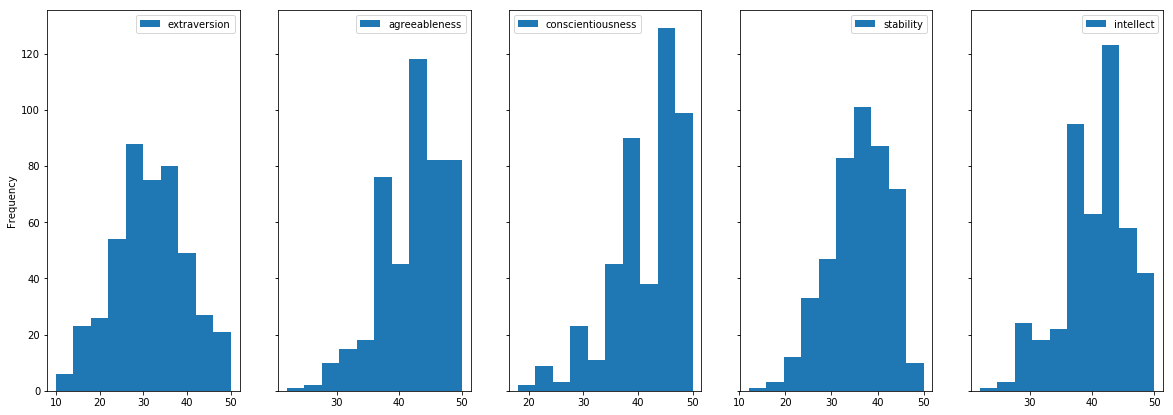

In [25]:
fig, axs = plt.subplots(1, 5, sharey=True)
data4.plot(kind='hist', y='extraversion', ax=axs[0], figsize=(20, 7))
data4.plot(kind='hist', y='agreeableness', ax=axs[1])
data4.plot(kind='hist', y='conscientiousness', ax=axs[2])
data4.plot(kind='hist', y='stability', ax=axs[3])
data4.plot(kind='hist', y='intellect', ax=axs[4])